In [1]:
from preprocessing.data_loader import load_and_process_data
import numpy as np
import matplotlib.pyplot as plt


df = load_and_process_data(remove_outliers=False, normalize=False, lab="all", verbose=False)
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1958286,0.139606,0.095954,0.214060,0.121142,0.201720,0.156274,0.123541,16.0,5.0,3.0,10794.0,150
1958287,0.113887,0.122214,0.271802,0.143455,0.170195,0.169966,0.125525,16.0,5.0,3.0,10795.0,150
1958288,0.096449,0.254481,0.149651,0.123115,0.101740,0.076557,0.097413,16.0,5.0,3.0,10796.0,150
1958289,0.065317,0.313154,0.243949,0.100223,0.075370,0.135688,0.077541,16.0,5.0,3.0,10797.0,150


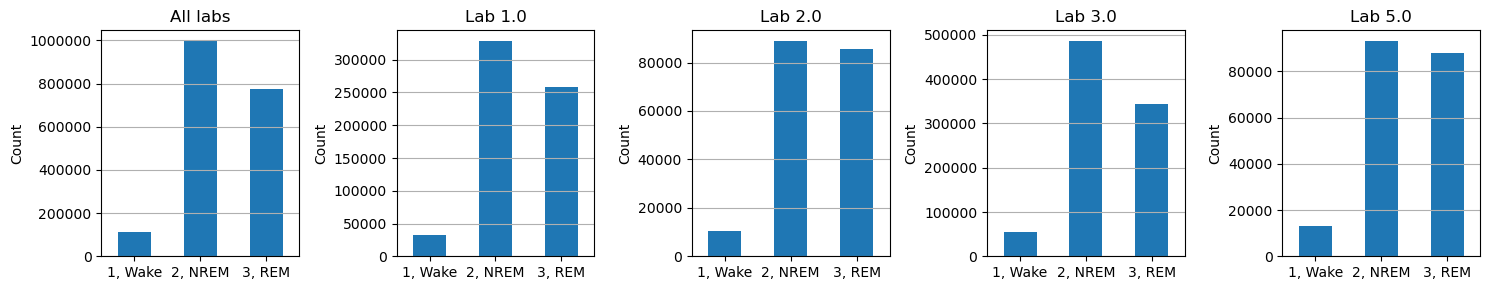

In [9]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3))  # Create a grid of 5 plots horizontally

labs = df['lab'].unique()  # Get the unique labs

# Plot for all labs
class_counts = df['sleepstage'].value_counts().sort_index()
class_counts.index = class_counts.index.map({1: '1, Wake', 2: '2, NREM', 3: '3, REM'})
class_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title('All labs')
axs[0].set_ylabel('Count')
axs[0].set_xlabel('')  # Remove x-axis label
axs[0].tick_params(axis='x', rotation=0)
axs[0].ticklabel_format(style='plain', axis='y', useOffset=False)
axs[0].grid(axis='y')

# Plot for each specific lab
for i, lab in enumerate(labs, start=1):
    class_counts = df[df['lab'] == lab]['sleepstage'].value_counts().sort_index()
    class_counts.index = class_counts.index.map({1: '1, Wake', 2: '2, NREM', 3: '3, REM'})
    class_counts.plot(kind='bar', ax=axs[i])
    axs[i].set_title(f'Lab {lab}')
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel('')  # Remove x-axis label
    axs[i].tick_params(axis='x', rotation=0)
    axs[i].ticklabel_format(style='plain', axis='y', useOffset=False)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.savefig('class_distribution.svg', format='svg')
plt.show()

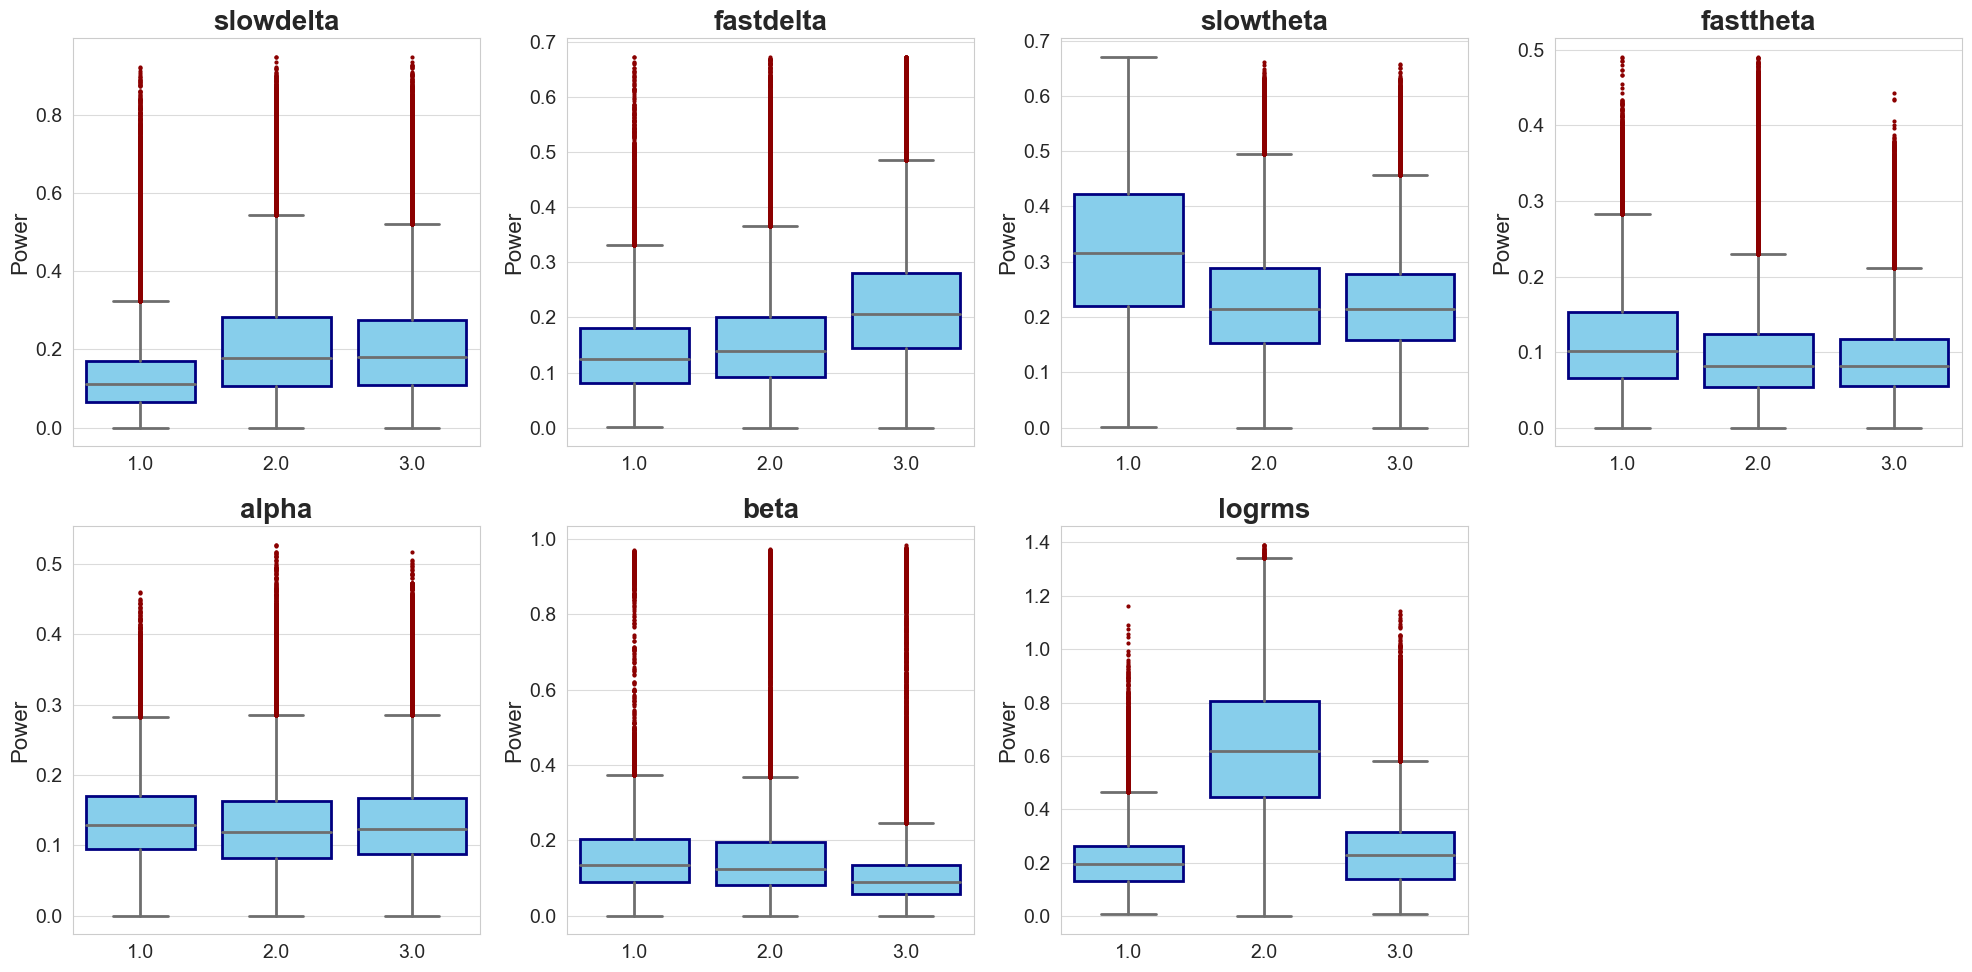

In [25]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = load_and_process_data(remove_outliers=True, normalize=False, lab="all", narcolepsy=False, verbose=False)


# Set global parameters for plotting
mpl.rcParams.update({
    'font.size': 16,
    'figure.figsize': (14, 7),  # aspect ratio
    'savefig.dpi': 600,  # Increase to 600 for higher resolution
    'axes.labelsize': 16,
    'axes.titlesize': 30,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'lines.linewidth': 2,
    'lines.markersize': 10,
    'grid.linestyle': '--',
    'grid.alpha': 0.7,
    'errorbar.capsize': 5
})

# bias
df['logrms'] = np.log1p(df['rms']) 
df.insert(7, 'logrms', df.pop('logrms'))

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust the size as needed
axes = axes.flatten()

# Remove the last subplot as it's not needed
fig.delaxes(axes[7])

# Define color palette and properties for box and fliers
palette = sns.color_palette("coolwarm", len(df['sleepstage'].unique()))
boxprops = dict(facecolor='skyblue', edgecolor='navy')
flierprops = dict(markerfacecolor='darkred', marker='o', markersize=2, markeredgecolor='darkred')

# Iterate over each EEG feature to create a boxplot for each
features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'logrms']
for ax, feature in zip(axes, features):
    sns.boxplot(x='sleepstage', y=feature, data=df, ax=ax,
                palette=palette, boxprops=boxprops, flierprops=flierprops)

    # Set title and labels
    ax.set_title(feature, fontsize=20, fontweight='bold')  # Increase fontsize here
    ax.set_xlabel('')
    ax.set_ylabel('Power')

# Adjust layout and show plot
plt.tight_layout()

# save
plt.savefig('mice_removed_outliers.png', format='png')

plt.show()

In [ ]:
from preprocessing.data_loader import load_and_process_data
import pandas as pd

data = load_and_process_data(remove_outliers = False, normalize=False, lab="3", narcolepsy=True, verbose=False)
print(data.head())
print(data.shape)

print(100*'-')

data = load_and_process_data(remove_outliers = True, normalize=False, lab="3", narcolepsy=True, verbose=False)
print(data.head())
print(data.shape)

# print unique sleep stages
print(data['sleepstage'].unique())

        slowdelta  fastdelta  slowtheta  fasttheta     alpha      beta  \
804034   0.366036   0.195850   0.114239   0.085030  0.154135  0.025679   
804035   0.128751   0.129808   0.138665   0.198757  0.101423  0.313100   
804036   0.278863   0.065376   0.121369   0.108310  0.123243  0.332001   
804037   0.299623   0.163685   0.139785   0.122137  0.107939  0.202042   
804038   0.344170   0.197025   0.087415   0.053043  0.113101  0.187154   

             rms  mouseID  lab  sleepstage  epoch  unique_id  narcolepsy  
804034  1.979966      1.0  3.0         2.0    1.0         45           0  
804035  1.313834      1.0  3.0         2.0    2.0         45           0  
804036  1.070938      1.0  3.0         2.0    3.0         45           0  
804037  1.206992      1.0  3.0         2.0    4.0         45           0  
804038  1.375492      1.0  3.0         2.0    5.0         45           0  
(1274257, 13)
-------------------------------------------------------------------------------------------

In [17]:
df = load_and_process_data(remove_outliers=True, normalize=False, lab="all", verbose=False)
print(df.head())

   slowdelta  fastdelta  slowtheta  fasttheta     alpha      beta       rms  \
0   0.286260   0.175425   0.207455   0.125388  0.108024  0.058404  0.338769   
1   0.238637   0.121246   0.174037   0.067707  0.070327  0.040197  0.248721   
2   0.121714   0.290182   0.313687   0.087330  0.092042  0.071340  0.228859   
3   0.090216   0.104930   0.454057   0.256769  0.107563  0.061333  0.211976   
6   0.077062   0.133382   0.458816   0.114722  0.097439  0.039885  0.228008   

   mouseID  lab  sleepstage  epoch  unique_id  
0      1.0  1.0         3.0    1.0          1  
1      1.0  1.0         3.0    2.0          1  
2      1.0  1.0         3.0    3.0          1  
3      1.0  1.0         1.0    6.0          1  
6      1.0  1.0         1.0    9.0          1  


In [1]:
from preprocessing.data_loader import load_and_process_data
import pandas as pd
import numpy as np

df = load_and_process_data(remove_outliers=True, normalize=False, lab="1", verbose=False, narcolepsy=False)

lab_counts = df['sleepstage'].value_counts() 
largest_lab = lab_counts.idxmax()
largest_percentage = lab_counts.max()/len(df)

# print index and baseline
print(largest_lab, largest_percentage)

baseline = largest_percentage

2.0 0.5329552297522772


[( 2, 0.54313964, 0.00094085) ( 3, 0.61218166, 0.01023559)
 ( 4, 0.66905755, 0.00542383) ( 5, 0.744432  , 0.04568455)
 ( 6, 0.8538961 , 0.03170882) ( 7, 0.9112982 , 0.00654034)
 ( 8, 0.91828626, 0.01525321) ( 9, 0.93192077, 0.00657817)
 (10, 0.92864585, 0.00727748)]


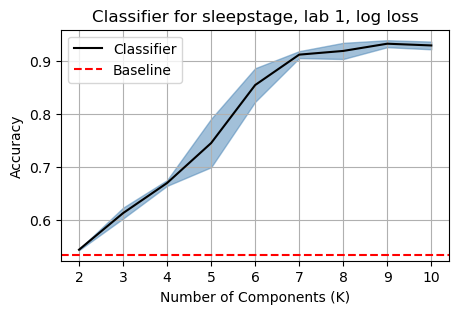

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_results(K, means, std_devs, chosen_model='XGBoost'):
    plt.figure(figsize=(5,3))
    plt.plot(K, means, 'k-', label='Classifier')  # mean curve
    plt.fill_between(K, means - std_devs, means + std_devs, color='steelblue', alpha=0.5)
    plt.axhline(baseline, color='r', linestyle='--', label='Baseline') # baseline for comparison
    plt.title(f"")
    plt.xlabel("Number of Components (K)")
    plt.ylabel("Accuracy")
    plt.title(f"Classifier for sleepstage, lab 1, log loss")
    plt.xticks(K)
    plt.grid()
    plt.legend()  # Add this line to display the legend
    plt.savefig('sleepstage_log_1_lab_lab.svg', format='svg')  # Save the figure as an SVG file
    plt.show()
    
if __name__ == '__main__':
    data = np.load('', allow_pickle=True)
    print(data)
    K = data['K']
    means = data['mean']
    std_devs = data['std']
    plot_results(K, means, std_devs)

In [10]:
from preprocessing.data_loader import load_and_process_data
import pandas as pd
import numpy as np

df = load_and_process_data(remove_outliers=True, normalize=False, lab="3", verbose=False, narcolepsy=True)
# shuffle df
df = df.sample(frac=1)
df

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id,narcolepsy
2025557,0.073226,0.104006,0.275824,0.076385,0.156583,0.333602,1.945520,43.0,3.0,1.0,2414.0,154,1
879498,0.138283,0.175903,0.289131,0.115349,0.119697,0.205093,0.375269,4.0,3.0,2.0,11166.0,48,0
2319824,0.107822,0.367280,0.254668,0.062868,0.082426,0.095642,0.293474,66.0,3.0,2.0,15881.0,167,1
2087569,0.583196,0.172862,0.112730,0.034728,0.052208,0.081748,0.442949,47.0,3.0,2.0,21226.0,156,1
978816,0.380762,0.147316,0.121555,0.052616,0.124682,0.077750,0.698966,23.0,3.0,2.0,409.0,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324644,0.181182,0.199619,0.272351,0.072896,0.114353,0.112051,0.195437,66.0,3.0,2.0,20701.0,167,1
1969845,0.065639,0.095096,0.275775,0.156579,0.271383,0.176465,1.000000,12.0,3.0,1.0,11555.0,152,1
2313970,0.212720,0.099420,0.105575,0.063276,0.178562,0.238942,1.036432,66.0,3.0,1.0,10027.0,167,1
2270779,0.268631,0.173334,0.105520,0.097731,0.189278,0.272528,0.864447,62.0,3.0,1.0,10036.0,165,1
